## Q9高斯滤波

高斯滤波器是一种可以使图像平滑的滤波器，用于去除噪声。
可用于去除噪声的滤波器还有中值滤波器（参见问题10），平滑滤波器（参见问题11）、LoG 滤波器（参见问题19）

高斯滤波器将中心像素周围的像素按照高斯分布加权平均进行平滑化。
这样的（二维）权值通常被称为卷积核或者滤波器。

### pading
但是，由于图像的长宽可能不是滤波器大小的整数倍，因此我们需要在图像的边缘补0。
这种方法称作 Zero Padding。并且权值（卷积核）要进行归一化操作(sum g = 1)

权值 
$$g(x,y,s) = 1/ (s*sqrt(2 * pi)) * exp( - (x^2 + y^2) / (2*s^2))$$

```
标准差 s = 1.3 的 8 近邻 高斯滤波器如下：
            1 2 1
 K = 1/16 [ 2 4 2 ]
            1 2 1
```

### opencv函数：
```
dst=cv2.GaussianBlur(src,ksize,sigmaX)

```


[参考](https://blog.csdn.net/eastmount/article/details/82216380)

-----


## Q10 中值滤波

采用临近像素的**中值**代替该像素

1. 中值：将临近像素排序取中值

-----

## Q11 均值滤波

均值滤波器使用网格内像素的平均值

-----

## Q12 Motion Filter
Motion Filter 取对角线方向的像素的平均值，像下式这样定义：
```
  1/3  0   0
[  0  1/3  0 ]
   0   0  1/3

```


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Motion fliter kernel:
 [[0.33333333 0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.33333333]]


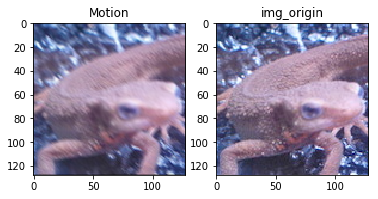

In [7]:
img = cv2.imread("gg.jpg")
img_origin = img.copy()
(H, W, C) = img.shape

"""
:param FILTER_MODE -> Gaussian \ Median \ Mean \ Motion
"""

FILTER_MODE = "Motion" #
filter_kernel_size = 3


# zero padding
padding = filter_kernel_size // 2 # //表示整除，向下取整
img_padding = np.zeros((H + padding*2, W + padding*2, C), dtype=np.float)
img_padding[padding: padding + H, padding: padding + W] = img.copy().astype(np.float)


# creat fliter kernel
if FILTER_MODE == "Gaussian":
    # creat Gaussian fliter kernel
    sigma = 1.3
    
    K_Gaussian = np.zeros((filter_kernel_size, filter_kernel_size), dtype=np.float)
    for x in range(-padding, -padding+filter_kernel_size):
        for y in range(-padding, -padding+filter_kernel_size):
            K_Gaussian[y+padding, x+padding] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
    K_Gaussian /= (sigma * np.sqrt(2 * np.pi))
    K_Gaussian /= K_Gaussian.sum()
    print("Gaussian fliter kernel:\n", K_Gaussian)
    
    filter_kernel = K_Gaussian


if FILTER_MODE == "Motion":
    K_Motion = np.eye(filter_kernel_size, dtype=np.float) * (1 / filter_kernel_size)
    print("Motion fliter kernel:\n", K_Motion)

    filter_kernel = K_Motion

    


# fliter processing
for h in range(H):
    for w in range(W):
        for c in range(C):
            if FILTER_MODE == "Gaussian" or FILTER_MODE == "Motion":
                img[h, w, c] = np.sum(img_padding[h : h + filter_kernel_size, w : w + filter_kernel_size, c]  *  filter_kernel)
            if FILTER_MODE == "Median":
                img[h, w, c] = np.median(img_padding[h : h + filter_kernel_size, w : w + filter_kernel_size, c])
            if FILTER_MODE == "Mean":
                img[h, w, c] = np.mean(img_padding[h : h + filter_kernel_size, w : w + filter_kernel_size, c])
                       
img = img.astype(np.uint8)
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.title(FILTER_MODE)
plt.subplot(122)
plt.imshow(img_origin)
plt.title("img_origin")
plt.show()